# Digest

In [26]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from config import PIPELINE_RUN_DIR, AMIMS, NETWORKS, SEED_SETS
from functions import split_module_id

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
path = os.path.join(PIPELINE_RUN_DIR, "main/results/mqc_summaries/digest_mqc.tsv")

In [11]:
amim_meta_df = pd.DataFrame.from_dict(AMIMS)
network_meta_df = pd.DataFrame.from_dict(NETWORKS)
seed_meta_df = pd.DataFrame.from_dict(SEED_SETS)

df = pd.read_csv(path, sep="\t")
df = pd.melt(df, id_vars='ID', var_name='source', value_name='value')
df[["seed_id","network_id","amim_id"]] = df.ID.apply(split_module_id)
df["network"] = df["network_id"].replace(dict(zip(network_meta_df.id, network_meta_df.label)))
df["amim"] = df["amim_id"].replace(dict(zip(amim_meta_df.id, amim_meta_df.label)))
df

,ID,source,value,seed_id,network_id,amim_id,network,amim
0,HD.hippie.v2_3_medium_confidence.Symbol.robust...,GO.BP,0.015907,HD,hippie.v2_3_medium_confidence.Symbol,robust_bias_aware,HIPPIE (medium confidence),ROBUST\n(bias aware)
1,UC.string.human_links_v12_0_min700.Symbol.rwr,GO.BP,1.854306,UC,string.human_links_v12_0_min700.Symbol,rwr,STRING (high confidence),RWR
2,UC.hippie.v2_3_high_confidence.Symbol.robust,GO.BP,0.896630,UC,hippie.v2_3_high_confidence.Symbol,robust,HIPPIE (high confidence),ROBUST
3,UC.hippie.v2_3_medium_confidence.Symbol.domino,GO.BP,1.921253,UC,hippie.v2_3_medium_confidence.Symbol,domino,HIPPIE (medium confidence),DOMINO
4,CD.string.human_physical_links_v12_0_min700.Sy...,GO.BP,3.000434,CD,string.human_physical_links_v12_0_min700.Symbol,no_tool,"STRING (physical, high confidence)",Only seeds
...,...,...,...,...,...,...,...,...
1391,UC.hippie.v2_3_medium_confidence.Symbol.robust,KEGG,3.000434,UC,hippie.v2_3_medium_confidence.Symbol,robust,HIPPIE (medium confidence),ROBUST
1392,HD.hippie.v2_3_medium_confidence.Symbol.robust,KEGG,2.301464,HD,hippie.v2_3_medium_confidence.Symbol,robust,HIPPIE (medium confidence),ROBUST
1393,CD.string.human_physical_links_v12_0_min700.Sy...,KEGG,0.288627,CD,string.human_physical_links_v12_0_min700.Symbol,domino,"STRING (physical, high confidence)",DOMINO
1394,ALS.string.human_links_v12_0_min900.Symbol.dia...,KEGG,2.699404,ALS,string.human_links_v12_0_min900.Symbol,diamond,STRING (highest confidence),DIAMOnD


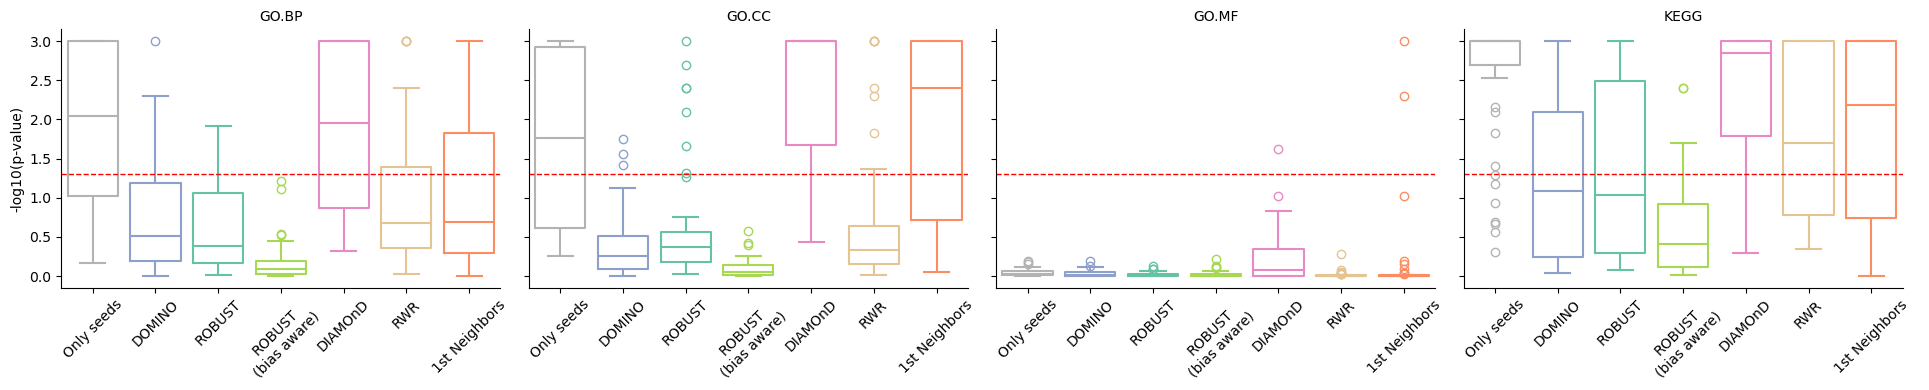

In [69]:
# Create FacetGrid
g = sns.FacetGrid(
    df,
    col="source",
    sharey=True,
    height=4,
    aspect=1.2
)

# Map the stripplot to each facet
g.map_dataframe(
    sns.boxplot,
    x="amim",
    y="value",
    hue="amim",
    palette=dict(zip(amim_meta_df.label, amim_meta_df.color)),
    hue_order=amim_meta_df.label,
    order=amim_meta_df.label,
    fill=False,
)

# Add horizontal lines to each subplot
for ax in g.axes.flat:
    ax.axhline(y=-math.log10(0.05), color='red', linestyle='--', linewidth=1)

# Clean up legend
g.add_legend(title="")  # Optional: set legend title
g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "-log10(p-value)")
g.set_xticklabels(rotation=45)

plt.tight_layout()
plt.show()

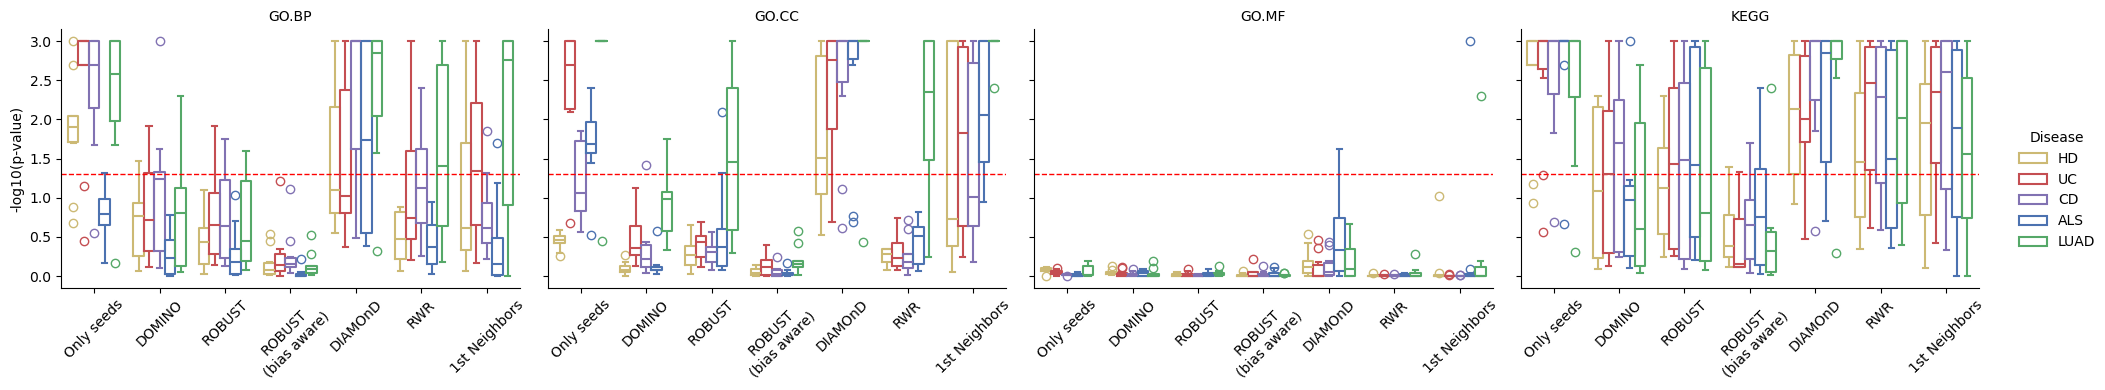

In [55]:
# Create FacetGrid
g = sns.FacetGrid(
    df,
    col="source",
    sharey=True,
    height=4,
    aspect=1.2
)

# Map the stripplot to each facet
g.map_dataframe(
    sns.boxplot,
    x="amim",
    y="value",
    hue="seed_id",
    palette=dict(zip(seed_meta_df.short, seed_meta_df.color)),
    hue_order=seed_meta_df.short,
    order=amim_meta_df.label,
    fill=False,
)

# Add horizontal lines to each subplot
for ax in g.axes.flat:
    ax.axhline(y=-math.log10(0.05), color='red', linestyle='--', linewidth=1)

# Clean up legend
g.add_legend(title="Disease")
g._legend.set_bbox_to_anchor((1.05, 0.5))
g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "-log10(p-value)")
g.set_xticklabels(rotation=45)

plt.tight_layout()
plt.show()

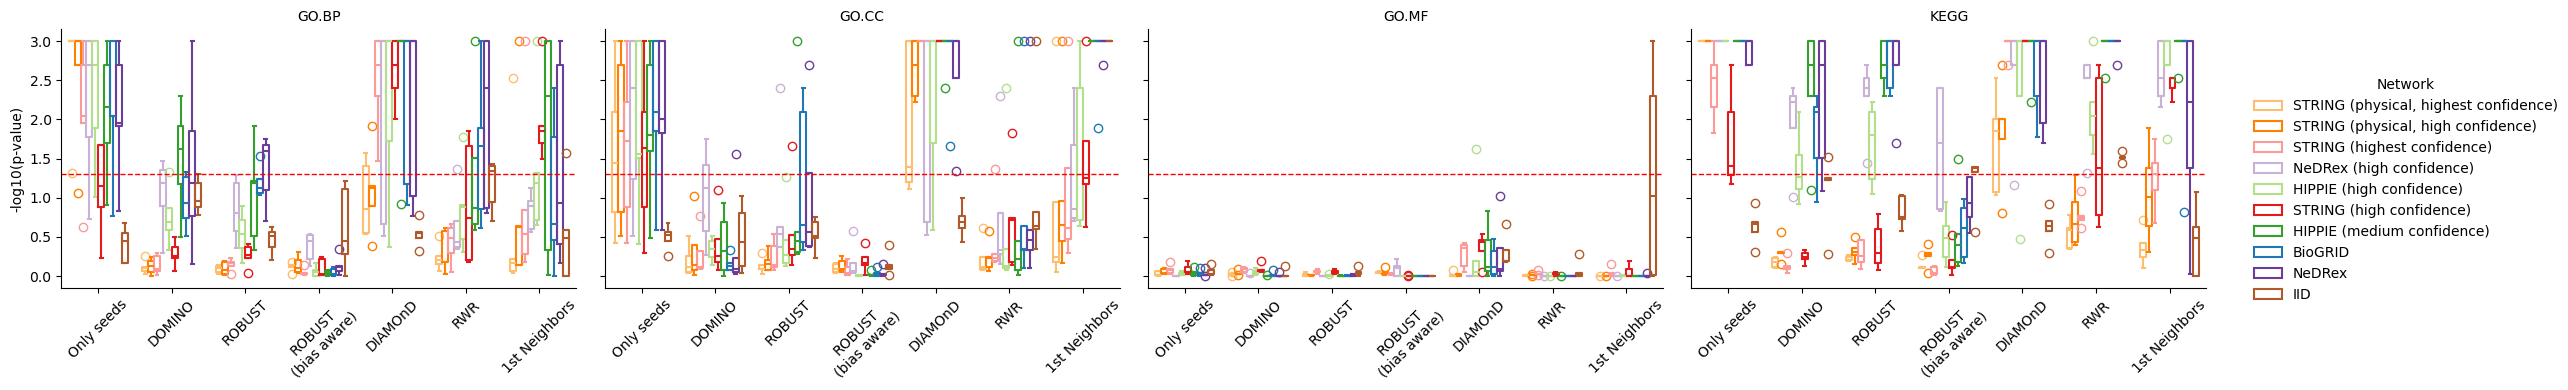

In [63]:
# Create FacetGrid
g = sns.FacetGrid(
    df,
    col="source",
    sharey=True,
    height=4,
    aspect=1.2
)

# Map the stripplot to each facet
g.map_dataframe(
    sns.boxplot,
    x="amim",
    y="value",
    hue="network",
    palette=dict(zip(network_meta_df.label, network_meta_df.color)),
    hue_order=network_meta_df.label,
    order=amim_meta_df.label,
    fill=False,
)

# Add horizontal lines to each subplot
for ax in g.axes.flat:
    ax.axhline(y=-math.log10(0.05), color='red', linestyle='--', linewidth=1)

# Clean up legend
g.add_legend(title="Network")
g._legend.set_bbox_to_anchor((1.15, 0.5))
g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "-log10(p-value)")
g.set_xticklabels(rotation=45)

plt.tight_layout()
plt.show()

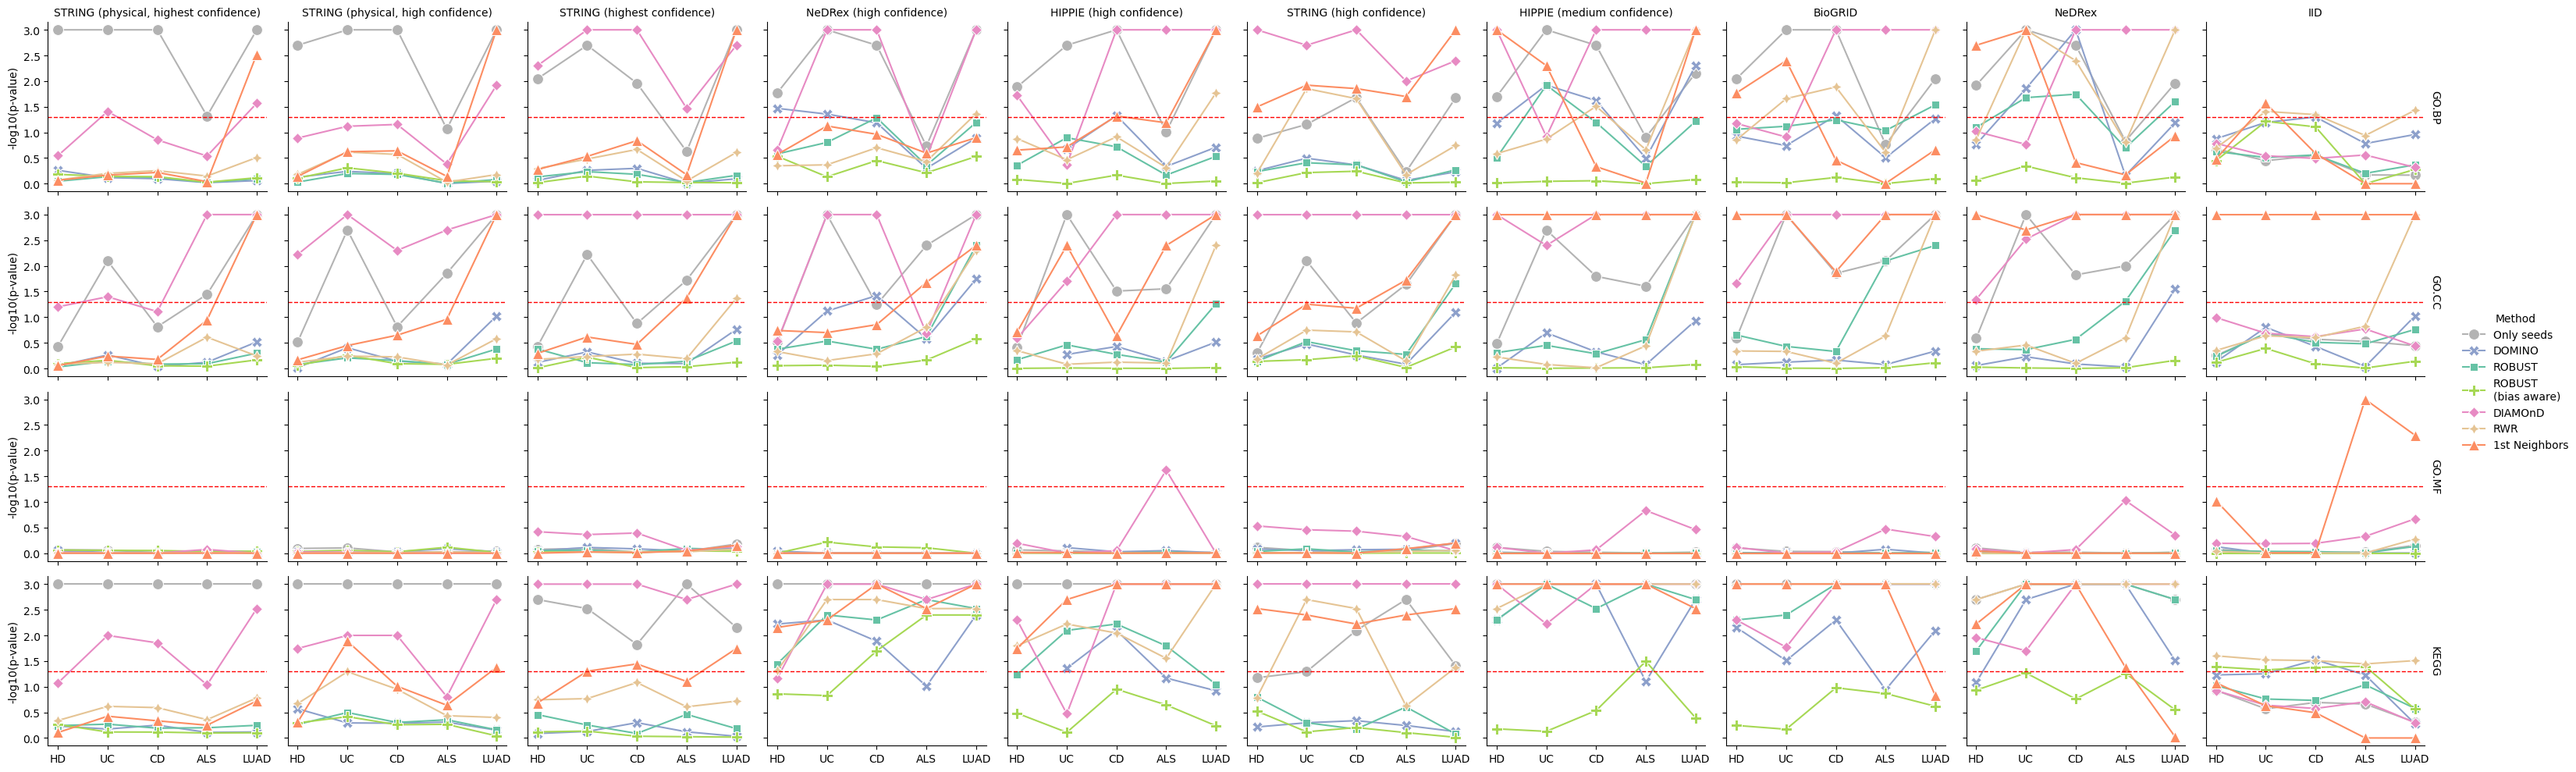

In [108]:
# Create FacetGrid
df['seed_id'] = pd.Categorical(df['seed_id'], seed_meta_df.short, ordered=True)

g = sns.FacetGrid(
    df,
    col="network",
    col_order=network_meta_df.label,
    row="source",
    sharey=True,
    margin_titles=True,
    height=2.5,
    aspect=1.2,
)

# Map the stripplot to each facet
g.map_dataframe(
    sns.lineplot,
    x="seed_id",
    y="value",
    hue="amim",
    palette=dict(zip(amim_meta_df.label, amim_meta_df.color)),
    hue_order=amim_meta_df.label,
    markers=True,
    style="amim",
    style_order=amim_meta_df.label,
    dashes=False,
)

# Add horizontal lines to each subplot
for ax in g.axes.flat:
    ax.axhline(y=-math.log10(0.05), color='red', linestyle='--', linewidth=1)

    for line in ax.lines:
        line.set_markersize(10)  # Set marker size

# Clean up legend
g.add_legend(title="Method")
g._legend.set_bbox_to_anchor((1.05, 0.5))
g.set_titles(col_template="{col_name}",row_template="{row_name}")
g.set_axis_labels("", "-log10(p-value)")
#g.set_xticklabels(rotation=45)

plt.tight_layout()
plt.show()